In [81]:
from qutip import*
import numpy as np
import matplotlib.pyplot as plt

In [82]:
def plot_wigner(
    state,
    contour=False,
    fig=None,
    ax=None,
    max_alpha=3,
    cbar=False,
    npts=51,
    vmin = -1,
    vmax = 1
):
    
    xvec = np.linspace(-max_alpha, max_alpha, npts)
    W = wigner(ptrace(state,1) ,xvec , xvec, g = 2 )
    if fig is None:
        fig = plt.figure(figsize=(6, 5))
    if ax is None:
        ax = fig.subplots()
    if contour:
        levels = np.linspace(-1.1, 1.1, 102)
        im = ax.contourf(
            xvec, xvec, W, cmap="seismic", vmin=vmin, vmax=vmax, levels=levels,
        )
    else:
        im = ax.pcolormesh(
            xvec, xvec, W, cmap="seismic", vmin=vmin, vmax=vmax
        )
    

    ax.grid()
    # ax.set_title(title)

    fig.tight_layout()
    if cbar:
        fig.subplots_adjust(right=0.8, hspace=0.25, wspace=0.25)
        # todo: ensure colorbar even with plot...
        # todo: fix this colorbar

        cbar_ax = fig.add_axes([0.85, 0.225, 0.025, 0.65])
        ticks = np.linspace(-1, 1, 5)
        fig.colorbar(im, cax=cbar_ax, ticks=ticks)
    ax.set_aspect("equal", adjustable="box")
    
def char_func_grid(state, xvec):
    """Calculate the Characteristic function as a 2Dgrid (xvec, xvec) for a given state.

    Args:
        state (Qobject): State of which we want to calc the charfunc
        xvec (_type_): array of displacements. The char func will be calculated for the grid (xvec, xvec)

    Returns:
        tuple(ndarray, ndarray): Re(char func), Im(char func)
    """
    cfReal = np.empty((len(xvec),len(xvec)))
    cfImag = np.empty((len(xvec),len(xvec)))
    N = state.dims[0][1]

    for i, alpha_x in enumerate(xvec):
        for j, alpha_p in enumerate(xvec):
            expect_value = qt.expect(qt.displace(N, alpha_x +1j*alpha_p),qt.ptrace(state,1))
            cfReal[i,j] =  np.real(expect_value)
            cfImag[i,j] =  np.imag(expect_value)

    return cfReal,cfImag   


def plot_char(
    state,
    max_alpha=3,
    npts=50,
    real = True,
    fig=None,
    ax=None,
    vmin = -1,
    vmax = 1,
    cbar = False,

    ):

    xvec = np.linspace(-max_alpha, max_alpha, npts)
    CF_real, CF_imag = char_func_grid(state, xvec)

    if fig is None:
        fig = plt.figure(figsize=(6, 5))
    if ax is None:
        ax = fig.subplots()

    if real:
        im = ax.pcolormesh(xvec, xvec, (CF_real), cmap = 'bwr', vmin=vmin, vmax=vmax, shading='auto')
        ax.set_aspect('equal')

    else:
        
        im = ax.pcolormesh(xvec, xvec, (-CF_imag), cmap = 'bwr', vmin=vmin, vmax=vmax,shading='auto')
        ax.set_aspect('equal')


    if cbar:
        fig.subplots_adjust(right=0.8, hspace=0.25, wspace=0.25)
        # todo: ensure colorbar even with plot...
        # todo: fix this colorbar

        cbar_ax = fig.add_axes([0.85, 0.225, 0.025, 0.65])
        ticks = np.linspace(-1, 1, 5)
        fig.colorbar(im, cax=cbar_ax, ticks=ticks)

In [84]:
# prepare everything
N = 50
a = destroy(N)
rho_init = (coherent(N,2)-coherent(N,-2)).unit()
T1 = 5
T2 = np.inf
t_list = [0.,  0.1, 0.2, 0.4, 0.8, 1.2 , 2.5 , 3.75, 5.  ]
a_decay = np.sqrt(1/T1)*a
a_dephasing = np.sqrt(1/T2) * (a * a.dag() + a.dag() * a)
loss = [a_decay, a_dephasing]

In [85]:
rhos = mesolve(qeye(N),rho_init, t_list, c_ops = loss, options=Options(nsteps=2000)).states

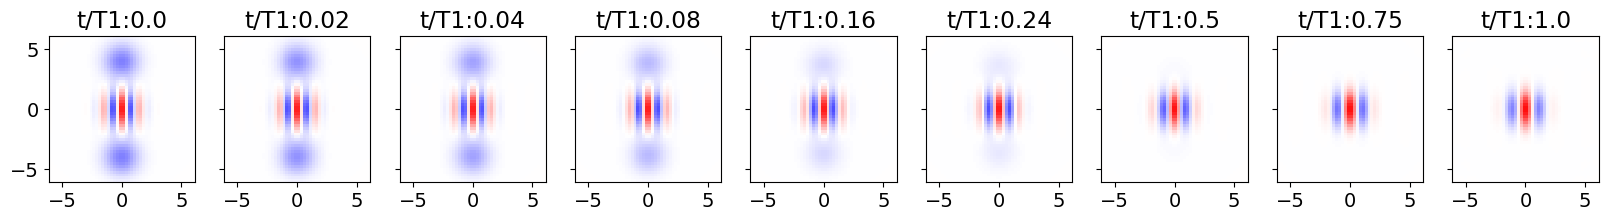

<Figure size 600x500 with 0 Axes>

<Figure size 600x500 with 0 Axes>

<Figure size 600x500 with 0 Axes>

<Figure size 600x500 with 0 Axes>

<Figure size 600x500 with 0 Axes>

<Figure size 600x500 with 0 Axes>

<Figure size 600x500 with 0 Axes>

<Figure size 600x500 with 0 Axes>

<Figure size 600x500 with 0 Axes>

In [88]:
fig, axs = plt.subplots(1,len(rhos), sharey='row', figsize = (20,10))
for i, rho in enumerate(rhos):
    rho_tensor = tensor(fock(2,0)*fock(2,0).dag(), rho)
    plot_char(rho_tensor, ax = axs[i], max_alpha = 6)

    axs[i].set_title(f"t/T1:{np.round(t_list[i]/T1,2)}")
    
    
    

In [ ]:
axs[i]